xover1: 1000.0, mn: 70.0, ma: 70.0
xover2: 5000.0, mn: 50.0, ma: 50.0


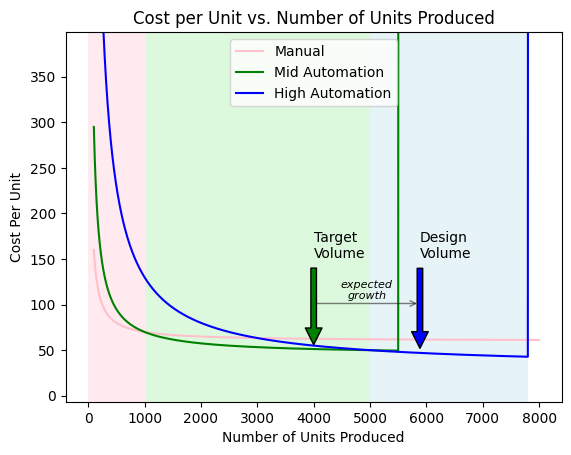

In [143]:
# mkdocs: render
# mkdocs: hidecode

from typing import Callable, Any
import matplotlib.pyplot as plt
import numpy as np

series = [
  {
    'color': 'pink',
    'fixed_cost': 100,
    'var_cost': 60,
    'label': 'Manual',
    'limit': -1
  },
  {
    'color': 'green',
    'fixed_cost': 250,
    'var_cost': 45,
    'label': 'Mid Automation',
    'limit': 55
  },
  {
    'color': 'blue',
    'fixed_cost': 1000,
    'var_cost': 30,
    'label': 'High Automation',
    'limit': 78
  }  
]

x_min = 1.0
x_max = 80.0
y_max = 0.4*1000.0/x_min
x_scale = 100
y_scale = 1

# Define the range of number of units produced
num_units = np.arange(x_min, x_max, 1/x_scale)

def unit_cost(s: dict[str, Any]) -> Callable[[float], float]:
  return lambda units : y_scale*(s['fixed_cost']/units + s['var_cost']) if s['limit'] < 0 or units < s['limit'] else y_scale*y_max

# Plot the graph
for s in series: 
  plt.plot([x*x_scale for x in num_units], 
           [unit_cost(s)(u) for u in num_units], 
           color=s['color'],
           label=s['label'])

manual_cross_over: float = (series[0]['fixed_cost'] - series[1]['fixed_cost'])/(series[1]['var_cost']-series[0]['var_cost'])
mid_cross_over: float =  (series[2]['fixed_cost'] - series[1]['fixed_cost'])/(series[1]['var_cost']-series[2]['var_cost'])
print(f"xover1: {manual_cross_over*x_scale}, mn: {unit_cost(series[0])(manual_cross_over)}, ma: {unit_cost(series[1])(manual_cross_over)}")
print(f"xover2: {mid_cross_over*x_scale}, mn: {unit_cost(series[1])(mid_cross_over)}, ma: {unit_cost(series[2])(mid_cross_over)}")
plt.axvspan(0, manual_cross_over*x_scale, facecolor='pink', alpha=0.3)
plt.axvspan(manual_cross_over*x_scale, mid_cross_over*x_scale, facecolor='lightgreen', alpha=0.3)
plt.axvspan(mid_cross_over*x_scale, series[2]['limit']*x_scale, facecolor='lightblue', alpha=0.3)

design = series[1]
target_point = mid_cross_over*0.8
design_point = design['limit']*1.07
design_cost = unit_cost(series[2])(design_point)
target_cost = unit_cost(design)(target_point)
plt.annotate("Design\nVolume", xytext=(design_point*x_scale, target_cost+100), xy=(design_point*x_scale, design_cost), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate("Target\nVolume", xytext=(target_point*x_scale, target_cost+100), xy=(target_point*x_scale, target_cost), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate("", xytext=(target_point*x_scale, target_cost+50), xy=(design_point*x_scale, target_cost+50), arrowprops=dict(facecolor='white', alpha=0.5, arrowstyle='->'))
plt.text((target_point+design_point)*x_scale/2.0, target_cost+55, "expected\ngrowth", ha='center', fontsize=8, fontstyle='oblique')

plt.ylim(ymax=y_max - 1)
plt.xlabel("Number of Units Produced")
plt.ylabel("Cost Per Unit")
plt.title("Cost per Unit vs. Number of Units Produced")
plt.legend(loc="upper center")